In [0]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
cd /content/drive/My Drive/Datasets/extracted/flower kaggle/

/content/drive/My Drive/Datasets/extracted/flower kaggle


In [0]:
import os
print(os.listdir('flowers'))

['dandelion', 'rose', 'sunflower', 'tulip', 'daisy']


In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
# from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from PIL import Image

In [0]:
class_names = ['daisy','rose','sunflower','tulip']

In [0]:
X=[]
Z=[]
IMG_SIZE=224
FLOWER_DAISY_DIR='flowers/daisy'
FLOWER_SUNFLOWER_DIR='flowers/sunflower'
FLOWER_TULIP_DIR='flowers/tulip'
#FLOWER_DANDI_DIR='flowers/dandelion'
FLOWER_ROSE_DIR='flowers/rose'

In [0]:
def assign_label(img, flower_type):
    return flower_type

In [0]:
# from PIL import Image
# from resizeimage import resizeimage

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
    

In [0]:
make_train_data(class_names[0],FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 769/769 [00:03<00:00, 200.25it/s]

769


In [0]:
make_train_data(class_names[1],FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:03<00:00, 200.50it/s]

1553


In [0]:
make_train_data(class_names[2],FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 734/734 [00:04<00:00, 157.33it/s]

2287


In [0]:
make_train_data(class_names[3],FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:05<00:00, 172.62it/s]

3271


In [0]:
print(len(X))

3271


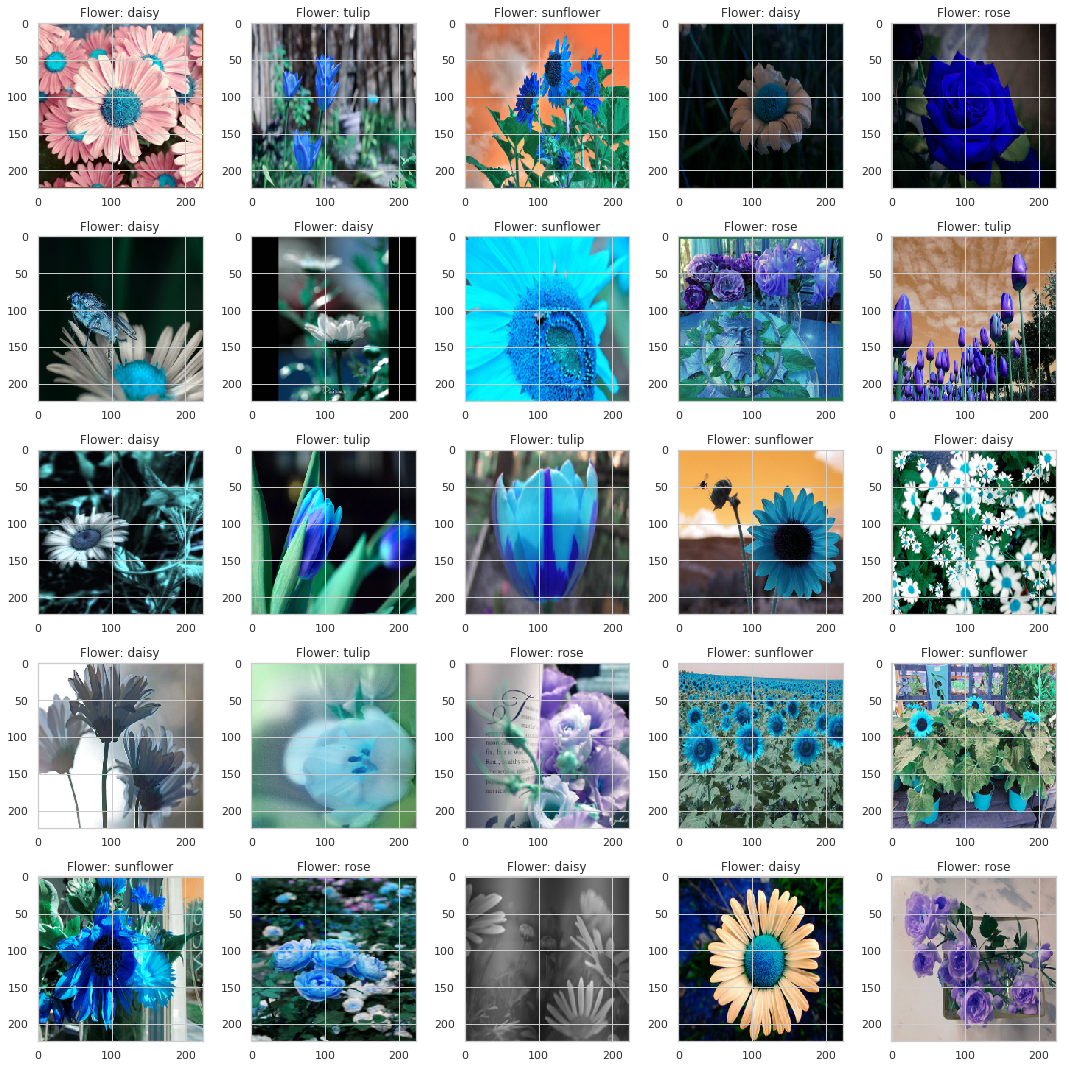

In [0]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,4)
X=np.array(X)
X=X/255

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [0]:
x_train.shape

(2616, 224, 224, 3)

In [0]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [0]:
cd /content/drive/My Drive/Datasets/deep-learning-models/

/content/drive/My Drive/Datasets/deep-learning-models


In [0]:
!ls

imagenet_utils.py  resnet50.py		     vgg16.py		      vgg19.py
inception_v3.py    vgg162.weights.best.hdf5  vgg16.weights.best.hdf5


## Tranfer learning vgg16

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.layers import merge, Input
from keras.models import Model

In [0]:
image_input = Input(shape=(224,224,3))

In [0]:
model = VGG16(include_top=True, weights ='imagenet', input_tensor=image_input)



553467904/553467096 [==============================] - 6s 0us/step








In [0]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
last_layer = model.get_layer("fc2").output
out = Dense(4, activation='softmax',name='output')(last_layer)
edited_vgg_model = Model(image_input,out)
edited_vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
edited_vgg_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


## Freeze the above layers and we train only the last layer

In [0]:
edited_vgg_model.layers[3].trainable
#edited_vgg_model.summary()
for layer in edited_vgg_model.layers[:-1]:
	layer.trainable = False
edited_vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="vgg16.weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [0]:
History = edited_vgg_model.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
                              epochs = 10, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 128,
                              callbacks=callbacks_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
20/20 [==============================] - 535s 27s/step - loss: 11.8951 - acc: 0.2281 - val_loss: 12.8453 - val_acc: 0.2031

Epoch 00001: val_acc improved from inf to 0.20305, saving model to vgg16.weights.best.hdf5
Epoch 2/10
20/20 [==============================] - 505s 25s/step - loss: 12.3292 - acc: 0.2351 - val_loss: 12.8453 - val_acc: 0.2031

Epoch 00002: val_acc did not improve from 0.20305
Epoch 3/10
20/20 [==============================] - 517s 26s/step - loss: 12.5285 - acc: 0.2227 - val_loss: 12.8453 - val_acc: 0.2031

Epoch 00003: val_acc did not improve from 0.20305
Epoch 4/10
20/20 [==============================] - 531s 27s/step - loss: 12.3026 - acc: 0.2367 - val_loss: 12.8453 - val_acc: 0.2031

Epoch 00004: val_acc did not improve from 0.20305
Epoch 5/10
20/20 [==============================] - 508s 25s/step - loss: 12.5522 - acc: 0.2212 - val_loss: 12.8453 - val_a

## Fine Tunning vgg16

In [0]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.layers import merge, Input
from keras.models import Model

In [0]:
image_input = Input(shape=(224 ,224, 3))

In [0]:
model = VGG16(input_tensor=image_input, include_top = True, weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
last_layer = model.get_layer('block5_pool').output
#print(last_layer)
x = Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation ='relu', name='fc2')(x)
out = Dense(4, activation='softmax', name='output')(x)
edt_vgg_model2 = Model(image_input, out)
#edt_vgg_model2.summary()

In [0]:
# freeze all the layer except the dense layers
for layer in edt_vgg_model2.layers[:-3]:
  layer.trainable = False
edt_vgg_model2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
edt_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [0]:
from keras.callbacks import ModelCheckpoint
filepath="vgg162.weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
History = edt_vgg_model2.fit_generator(datagen.flow(x_train,y_train, batch_size=64),
                              epochs = 10, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 64,
                              callbacks=callbacks_list)

Epoch 1/10
40/40 [==============================] - 103s 3s/step - loss: 0.9135 - acc: 0.6354 - val_loss: 0.5563 - val_acc: 0.8000

Epoch 00001: val_acc improved from -inf to 0.80000, saving model to vgg162.weights.best.hdf5
Epoch 2/10
40/40 [==============================] - 102s 3s/step - loss: 0.5456 - acc: 0.7832 - val_loss: 0.4775 - val_acc: 0.8244

Epoch 00002: val_acc improved from 0.80000 to 0.82443, saving model to vgg162.weights.best.hdf5
Epoch 3/10
40/40 [==============================] - 101s 3s/step - loss: 0.4135 - acc: 0.8401 - val_loss: 0.4445 - val_acc: 0.8305

Epoch 00003: val_acc improved from 0.82443 to 0.83053, saving model to vgg162.weights.best.hdf5
Epoch 4/10
40/40 [==============================] - 101s 3s/step - loss: 0.4050 - acc: 0.8452 - val_loss: 0.4835 - val_acc: 0.8244

Epoch 00004: val_acc did not improve from 0.83053
Epoch 5/10
40/40 [==============================] - 101s 3s/step - loss: 0.4247 - acc: 0.8409 - val_loss: 0.6368 - val_acc: 0.7740

Epoch

## 5) Visualizing Predictions on the Validation Set

In [0]:
# getting predictions on val set.
pred=edt_vgg_model2.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [0]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
#     if(len(prop_class)==8):
#         break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
#     if(len(mis_class)==8):
#         break

In [0]:
x_test.shape

(655, 224, 224, 3)

In [0]:
print(len(prop_class))
print(len(mis_class))

557
98


rose


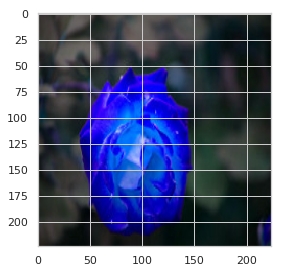

In [0]:
plt.imshow(x_test[5])
#pred[]
print(class_names[np.argmax(pred[5])])